In [106]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [107]:
# Import market news data

market_news = pd.read_csv (r'C:\Users\imaia\Desktop\Stats170A\Capstone\market_news_data.csv')


In [108]:
market_news.head()

,headline,source,url,date,score
0,This Coronavirus Insurance Bill Could Crash th...,ccn.com,https://www.ccn.com/this-coronavirus-insurance...,2020-04-06,-0.4019
1,China's Scary Coronavirus Warning Risks Epic S...,ccn.com,https://www.ccn.com/chinas-scary-coronavirus-w...,2020-04-28,-0.7717
2,Is Coca-Cola Stock the Real Deal?,smarteranalyst.com,http://www.smarteranalyst.com/analyst-insights...,2020-04-15,0.0000
3,Is AXP Stock a ‘Sell’ after Its Q1 Earnings?,marketrealist.com,https://marketrealist.com/2020/04/is-axp-stock...,2020-04-27,0.0000
4,Loeffler reports more stock sales denies wrong...,ajc.com,https://www.ajc.com/news/state--regional-govt-...,2020-04-06,-0.4703


In [109]:
# Aggregate the scores of news articles released on the same day

market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()


In [110]:
# Create sentiment categorical feature

# create a list of our conditions
conditions = [
    (market_news['score'] > 0),
    (market_news['score'] == 0),
    (market_news['score'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
market_news['level'] = np.select(conditions, values)

# display updated DataFrame
market_news.head()


,date,score,level
0,2020-04-01,0.050200,positive
1,2020-04-02,0.001914,positive
2,2020-04-03,0.000000,neutral
3,2020-04-05,0.000000,neutral
4,2020-04-06,-0.200040,negative


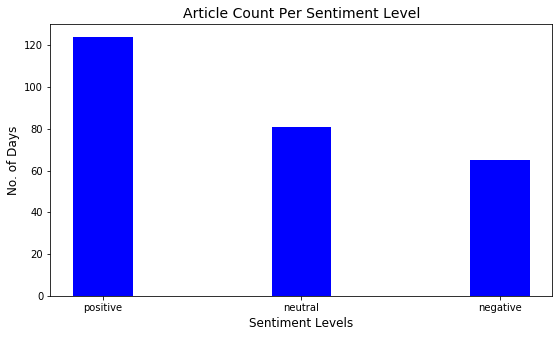

In [111]:
# Plot the count of each level

fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(values, market_news['level'].value_counts(), color ='blue', width = 0.3)
 
plt.xlabel("Sentiment Levels", size = 12)
plt.ylabel("No. of Days", size = 12)
plt.title("Article Count Per Sentiment Level", size = 14)
plt.show()

In [112]:
market_news.head()

,date,score,level
0,2020-04-01,0.050200,positive
1,2020-04-02,0.001914,positive
2,2020-04-03,0.000000,neutral
3,2020-04-05,0.000000,neutral
4,2020-04-06,-0.200040,negative


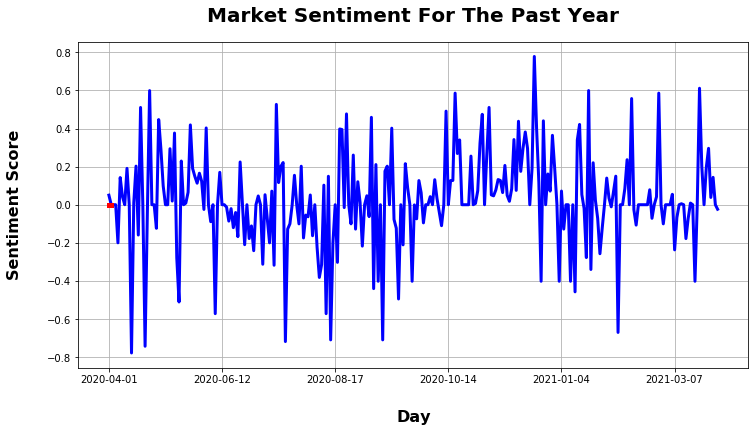

In [113]:

score_plot = market_news.plot(x = 'date', figsize = (12,6), color = 'Blue', linewidth=3,
                              grid = True, legend = False)

plt.title("Market Sentiment For The Past Year", pad = 20, fontweight='bold', size = 20)

locs, labels=plt.xticks()

plt.xlabel("Day", size = 16, weight = 'bold', labelpad = 25)
plt.ylabel("Sentiment Score", size = 16, weight = 'bold', labelpad = 25)

plt.plot(["2020-04-01", "2021-03-01"], [0, 0], color = "red", linewidth = 5)

plt.show()


In [114]:
market_news['year-month'] = market_news['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

market_news_month = market_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()


In [115]:
market_news_month.head()

,year-month,score
0,2020-04,0.018461
1,2020-05,0.087572
2,2020-06,-0.063644
3,2020-07,-0.032407
4,2020-08,-0.054647


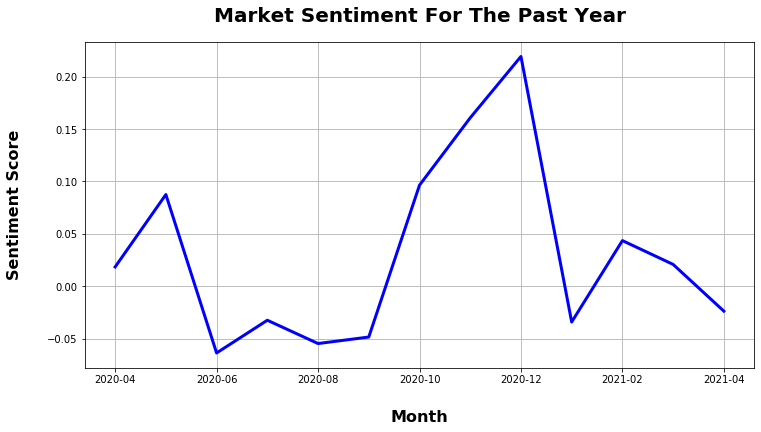

In [116]:
score_plot2 = market_news_month.plot(x = 'year-month', figsize = (12,6), color = ['Blue', 'Purple', 'darkorange'], linewidth=3,
                              grid = True, legend = False)

plt.title("Market Sentiment For The Past Year", pad = 20, fontweight='bold', size = 20)

locs, labels=plt.xticks()

plt.xlabel("Month", size = 16, weight = 'bold', labelpad = 25)
plt.ylabel("Sentiment Score", size = 16, weight = 'bold', labelpad = 25)

plt.show()

In [129]:
# Import stock news data

stock_news = pd.read_csv (r'C:\Users\imaia\Desktop\Stats170A\Capstone\stock_news_data.csv')


In [130]:
stock_news.head()

,ticker,headline,source,url,date,score
0,AAPL,Dow Futures Soar as New York Begins Winning th...,ccn.com,https://www.ccn.com/dow-futures-soar-as-new-yo...,2020-04-06,-0.1280
1,AAPL,Apple Snaps Up AI Startup Inductiv As Analysts...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/apple-sna...,2020-05-28,0.4019
2,AAPL,Gates Foundation Buys Up Amazon Apple Twitter ...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/gates-fou...,2020-05-25,0.1779
3,AAPL,Apple China Sales On Recovery Path In April iP...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/apple-chi...,2020-05-25,0.0000
4,AAPL,Intel Taiwan Semiconductor Said to Be in Talks...,smarteranalyst.com,http://www.smarteranalyst.com/uncategorized/in...,2020-05-13,0.0000


In [132]:
# Aggregate the scores of news articles released on the same day

stock_news_agg = stock_news.groupby('date').agg({'score' : 'mean'}).reset_index()


In [133]:
# Create sentiment categorical feature

# create a list of our conditions
conditions = [
    (stock_news_agg['score'] > 0),
    (stock_news_agg['score'] == 0),
    (stock_news_agg['score'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
stock_news_agg['level'] = np.select(conditions, values)

# display updated DataFrame
stock_news_agg.head()


,date,score,level
0,2020-04-01,0.000000,neutral
1,2020-04-02,-0.050300,negative
2,2020-04-03,-0.031657,negative
3,2020-04-04,-0.389150,negative
4,2020-04-05,-0.028500,negative


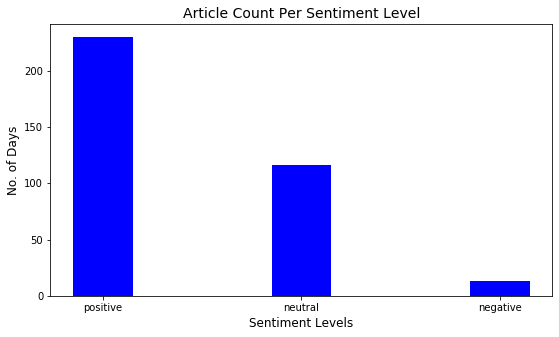

In [134]:
# Plot the count of each level

fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(values, stock_news_agg['level'].value_counts(), color ='blue', width = 0.3)
 
plt.xlabel("Sentiment Levels", size = 12)
plt.ylabel("No. of Days", size = 12)
plt.title("Article Count Per Sentiment Level", size = 14)
plt.show()

In [140]:
tickers= ["AAPL", "FB", "ADBE", "INTC", "PYPL", "BABA", "QCOM", "SHOP", "AMD", "MSFT"]

news_data = pd.DataFrame()

for ticker in tickers:
    
    if news_data.empty == True:
        one = stock_news[stock_news['ticker'] == ticker]
        one = one.groupby('date').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        one.head()
        news_data = one
    else:
        one = stock_news[stock_news['ticker'] == ticker]
        one = one.groupby('date').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        news_data = news_data.append(one)
        
news_data.head()

,date,score,ticker
0,2020-04-06,-0.12800,AAPL
1,2020-05-13,0.00000,AAPL
2,2020-05-25,0.08895,AAPL
3,2020-05-28,0.40190,AAPL
4,2020-06-17,0.12615,AAPL


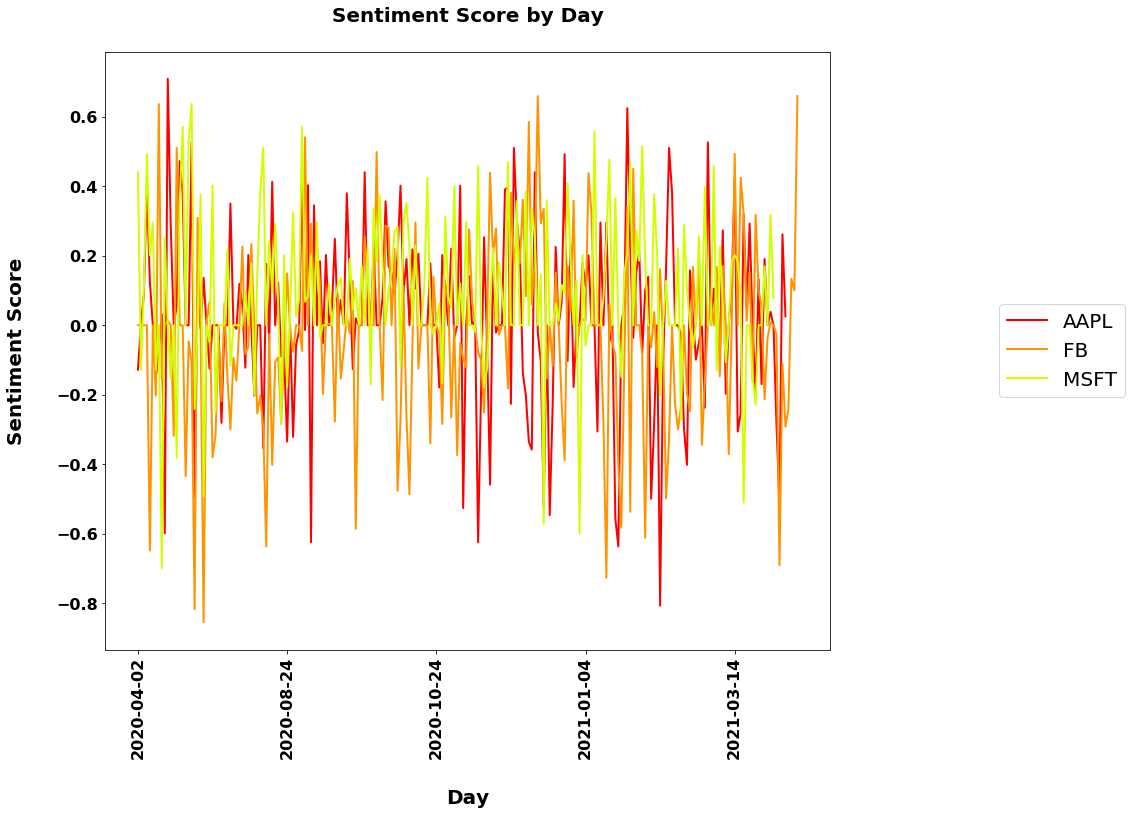

In [159]:
sub = news_data[news_data['ticker'].isin(["AAPL", "MSFT", "FB"])]

fig, ax = plt.subplots()

cm = plt.get_cmap('hsv')
ax.set_prop_cycle(color = [cm(1.*i/10) for i in range(3)])

for label, grp in sub.groupby('ticker'):
    grp.plot(x = 'date', y = 'score', ax = ax, label = label, figsize = (13,11), linewidth=2)
    ax.set_xlabel("Day", size = 20, fontweight='bold', labelpad = 30)
    ax.set_ylabel("Sentiment Score", size = 20, fontweight='bold', labelpad = 30)

plt.title("Sentiment Score by Day", fontweight='bold', size = 20, pad = 30)    
plt.legend(loc = 'right', bbox_to_anchor = (1.42, 0.5), prop = {'size': 20})
plt.xticks(rotation=90, size = 16, weight = 'bold')
plt.yticks(size = 16, weight = 'bold')
plt.show()


In [166]:
news_data['year-month'] = news_data['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

tickers= ["AAPL", "FB", "ADBE", "INTC", "PYPL", "BABA", "QCOM", "SHOP", "AMD", "MSFT"]

news_data2 = pd.DataFrame()

for ticker in tickers:
    
    if news_data2.empty == True:
        one = news_data[news_data['ticker'] == ticker]
        one = one.groupby('year-month').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        one.head()
        news_data2 = one
    else:
        one = news_data[news_data['ticker'] == ticker]
        one = one.groupby('year-month').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        news_data2 = news_data2.append(one)
        
news_data2.head()

,year-month,score,ticker
0,2020-04,-0.128000,AAPL
1,2020-05,0.163617,AAPL
2,2020-06,0.039523,AAPL
3,2020-07,0.057563,AAPL
4,2020-08,-0.039304,AAPL


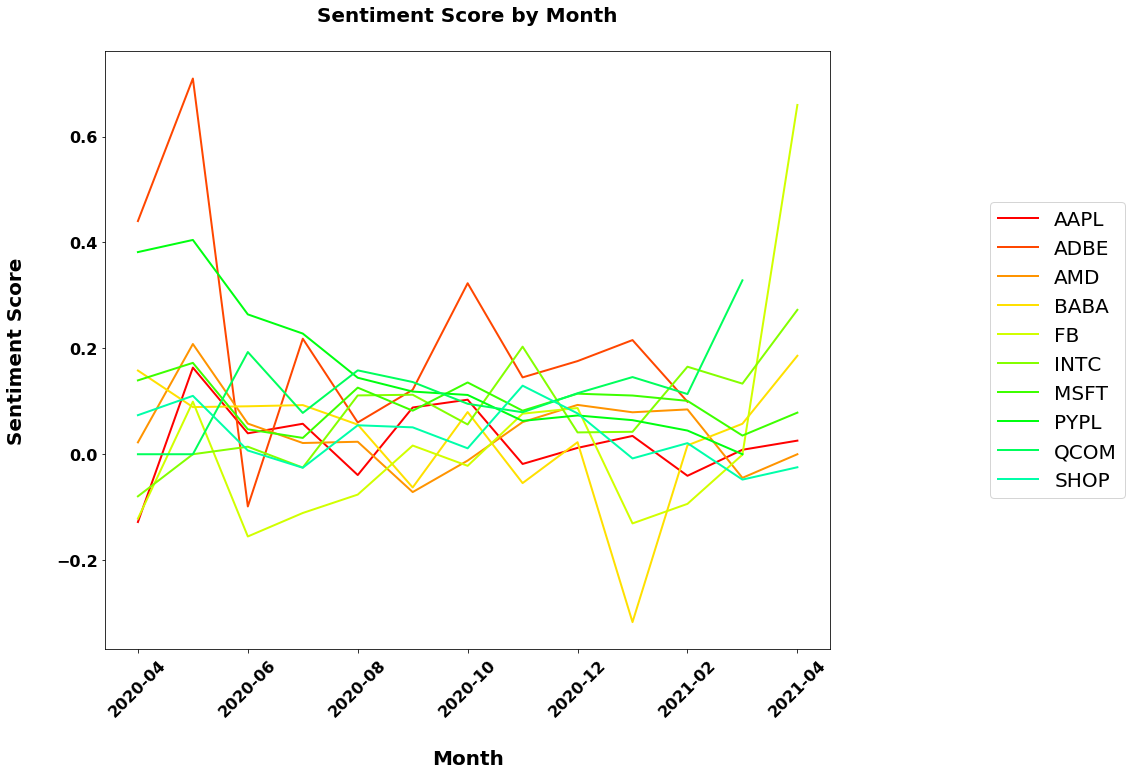

In [174]:
sub = news_data2[news_data2['ticker'].isin(["AAPL", "MSFT", "FB"])]

fig, ax = plt.subplots()

cm = plt.get_cmap('hsv')
ax.set_prop_cycle(color = [cm(1.*i/20) for i in range(10)])

for label, grp in news_data2.groupby('ticker'):
    grp.plot(x = 'year-month', y = 'score', ax = ax, label = label, figsize = (13,11), linewidth=2)
    ax.set_xlabel("Month", size = 20, fontweight='bold', labelpad = 30)
    ax.set_ylabel("Sentiment Score", size = 20, fontweight='bold', labelpad = 30)

plt.title("Sentiment Score by Month", fontweight = 'bold', size = 20, pad = 30)    
plt.legend(loc = 'right', bbox_to_anchor = (1.42, 0.5), prop = {'size': 20})
plt.xticks(rotation=45, size = 16, weight = 'bold')
plt.yticks(size = 16, weight = 'bold')
plt.show()
